<a href="https://colab.research.google.com/github/PauloVictorFS/fastaiOnCampus/blob/main/lesson02_211043718_PauloVictorFS_Paulo_Victor_Fonseca_Sousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Diferenciar hamster e porquinho-da-índia
Aluno: Paulo Victor Fonseca Sousa

Matricula:211043718

Github:PauloVictorFS

##Introdução

O projeto a  seguir   tem como objetivo explorar o aprendizado de máquina aplicado à classificação de imagens. A tarefa principal será treinar um modelo de aprendizado profundo capaz de distinguir entre um hamster e um porquinho da índia em imagens. Esse projeto foi organizado conforme   as diretrizes  que serão definidas a seguir:
## Critérios do projeto:
- Propósito: O projeto tem como propósito principal a criação de um modelo de aprendizado de máquina para diferenciar hamsters de porquinhos da india em imagens . O objetivo é aplicar técnicas de aprendizado profundo para resolver essa tarefa.

- Tema Abordado na Lição: O projeto está alinhado com os conceitos e técnicas apresentados na lição do Fastai relacionada ao aprendizado profundo e classificação de imagens.

- Dado Coerente com o Tema: Os dados utilizados para treinar e testar o modelo são imagens de hamsters e de porquinhos da india. Isso está em conformidade com a tarefa de diferenciação.

- Caracterização do Dado: Os dados são coletados da web usando a API do DuckDuckGo e passam por um processo de verificação manual de qualidade antes de serem usados para treinamento do modelo. O fluxo de aquisição e pré-processamento dos dados será detalhado.

- Organização: O projeto é organizado em células de código que executam tarefas específicas, desde a aquisição de dados até a criação, treinamento e avaliação do modelo. Isso proporciona uma estrutura clara para compreender o fluxo de trabalho. Cada célula será explicada de forma detalhada

- Jupyter: O projeto é elaborado usando um ambiente Jupyter Notebook, o que permite documentar as etapas do projeto e executar código interativamente.


## Passo 1 - Configurando o Ambiente
Nesta parte é instalado dois pacotes Python, "duckduckgo_search" e "fastai", usando o comando pip install. Esses pacotes são necessários para as tarefas subsequentes no projeto. Também  é realizado a importação de funções do pacote "duckduckgo_search" e definido uma função chamada search_images. Essa função permite buscar e coletar URLs de imagens relacionadas a um termo específico usando a API do DuckDuckGo.

In [1]:
!pip install -Uqq duckduckgo_search
!pip install -Uqq fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=300): return L(ddg_images(term, max_results=max_images)).itemgot('image')

## Passo 2 - Verificando o funcionamento da Função
 Nestas células, são realizados os downloads de uma única imagem de um "hamster" e de um "Porquinho-da-índia" usando a função download_url e exibido essas imagens em miniatura. Isso é realizado para garantir que a função está funcionando conforme o esperado

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


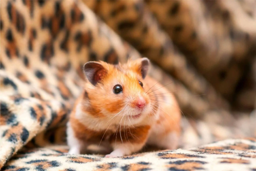

In [3]:
from fastai.vision.all import *
from fastdownload import download_url

download_url(search_images('Hamster', max_images=1)[0], 'Hamster.jpg', show_progress=True)
Image.open('Hamster.jpg').to_thumb(256,256)

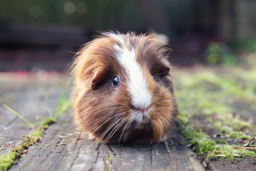

In [4]:
download_url(search_images('Guinea Pig', max_images=1)[0], 'Guinea.jpg', show_progress=False)
Image.open('Guinea.jpg').to_thumb(256,256)

### Passo 3 - Baixando e verificando  as imagens
Nesta célula, respectivamente, é definido uma lista de termos de busca através do 'searches' ("Hamster" e "Porquinho-da-índia") e um caminho de destino("path") para armazenar as imagens baixadas. Em seguida, é executado um loop para cada termo de busca, criando uma pasta para cada um, fazendo o download de imagens relacionadas a esses termos, aguardando entre cada pesquisa e redimensionando as imagens para um tamanho máximo de 400 pixels. Além disso é verificado a qualidade das imagens baixadas. A função verify_images é usada para verificar se as imagens são válidas e exclui aquelas que não atendem aos critérios de qualidade.

In [5]:
searches = ' Hamster','Guinea Pig'
path = Path('Hamster ou Guinea')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo', 100))
    resize_images(path/o, max_size=400, dest=path/o)

In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

## Passo 4 - Treinando o Modelo
Nesta célula, é definido um bloco de dados (DataBlock) para organizar os dados de imagem. Isso envolve a definição de blocos de entrada (imagem) e saída (categoria), bem como as transformações de dados e a divisão dos dados em conjuntos de treinamento e validação.

Além disso, é  exibido um lote de imagens dos conjuntos de dados de treinamento e validação usando a função show_batch. Isso ajuda a entender como os dados estão organizados e visualmente inspecionar as imagens.

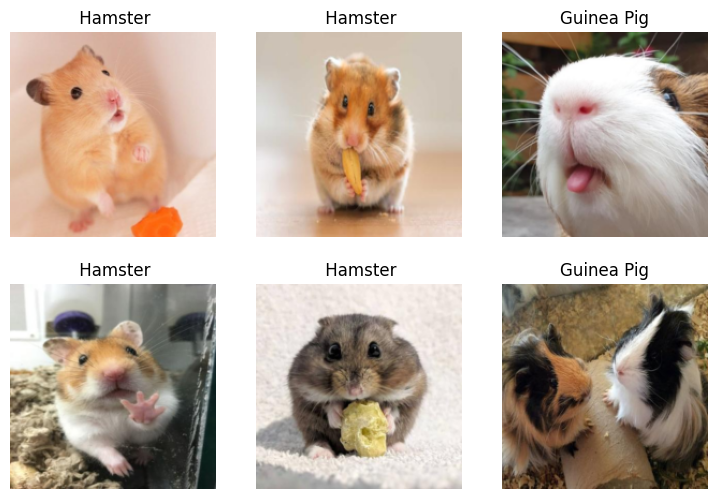

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

Após isso, é criado um modelo de aprendizado de máquina para classificar imagens de Hamsters e porquinhos da índia. Primeiro, foi utilizado a função vision_learner para criar um objeto "learn" que inclui um modelo de rede neural convolucional  baseado na arquitetura "resnet18". Esse modelo pré-treinado é uma forma de transferência de aprendizado, onde aproveitamos o conhecimento prévio do modelo sobre uma ampla variedade de imagens antes de ajustá-lo especificamente para nosso problema de classificação de emoções.

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 245MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.563368,3.077513,0.470588,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.443348,1.094688,0.294118,00:29
1,0.306691,0.284582,0.147059,00:27
2,0.209728,0.136815,0.088235,00:27


## Passo 5 - Analisando o modelo
Primeiramente é gerado a matriz de confusão, que mostra onde o modelo erra, e em seguida é mostrado  os maiores erros do nosso modelo



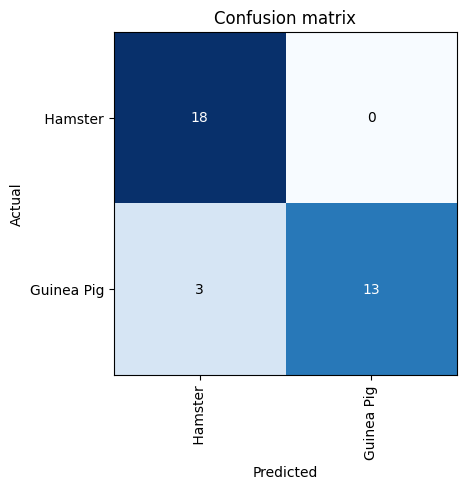

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

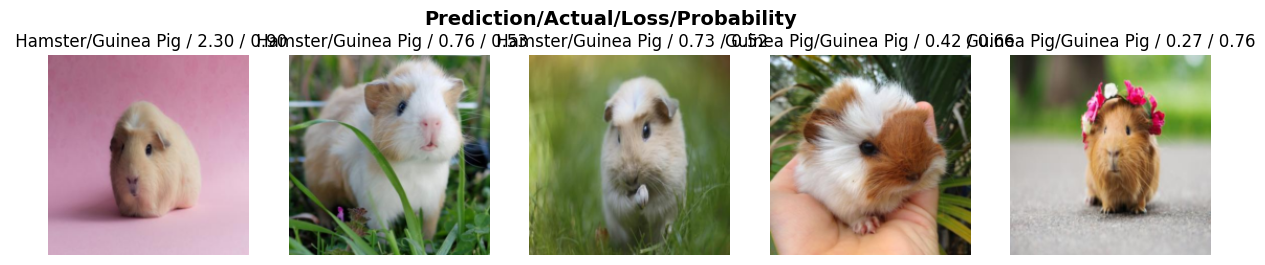

In [21]:
interp.plot_top_losses(5, nrows=1)

Nesta célula, é utilizado o modelo de aprendizado de máquina treinado anteriormente (resnet18) para fazer uma previsão sobre uma imagem de uma "Hamster" (imagem 'Hamster.jpg') e de um  "Porquinho-da-índia"(imagem 'Guinea.jpg'.) A probabilidade da imagem ser Um desses dois é exibida.

In [19]:
is_hamster,_,probs = learn.predict(PILImage.create('Hamster.jpg'))
print(f" Provavelmente é um :{is_hamster}.")
print(f"Probabilidade de Ser um hamster: {probs[0]:.4f}")

 Provavelmente é um : Hamster.
Probabilidade de Ser um hamster: 0.9979


In [20]:
is_hamster,_,probs = learn.predict(PILImage.create('Guinea.jpg'))
print(f" Provavelmente é um : {is_hamster}.")
print(f"Probabilidade de ser um porquinho-da-índia: {probs[1]:.4f}")

 Provavelmente é um : Guinea Pig.
Probabilidade de ser um porquinho-da-índia: 1.0000


## Passo 6 - Fazendo Deploy do Modelo
Com o modelo treinado e testado localmente, é exportado o modelo para ser usado no hugging Face




In [24]:
learn.export('model.pkl')

Com tudo configurado no Hugging Face o modelo fica disponível no seguinte link:
https://huggingface.co/spaces/Srpaulo122/Hamster_ou_guinea-pig